In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
class KMeans:
    def __init__(self,data,num_classes): # 传入数据和要分成的聚簇数
        self.data=data
        self.num_classes=num_classes
    # 训练函数
    def train(self,max_iteration):
        # 先随机选取K个中心点
        centroids=KMeans.centroids_init(self.data,self.num_classes)
        num_examples=self.data.shape[0]
        # 最小距离对应的聚簇
        closest_centroids_ids=np.empty((num_examples,1))
        # 迭代训练
        for epoch in range(max_iteration):
            # 计算每一个样本到当前K个中心点的距离，找到最小的
            closest_centroids_ids=KMeans.centroids_find_closest(self.data,centroids)
            # 中心点更新
            centroids=KMeans.centroids_compute(self.data,closest_centroids_ids,self.num_classes)
        return centroids,closest_centroids_ids

    # 随机初始化K个中心点
    @staticmethod
    def centroids_init(data,num_classes):
        num_examples=data.shape[0]
        randoms_ids=np.random.permutation(num_examples)
        centroids=data[randoms_ids[:num_classes],:] # 所有特征都要取
        return centroids
    @staticmethod
    def centroids_find_closest(data,centroids):
        num_examples=data.shape[0]
        num_centroids=centroids.shape[0] # 聚簇的个数
        # 将最近的点放到矩阵中
        closest_centroids_ids=np.zeros((num_examples,1))
        # 计算每个样本点到中心点的距离，找到最小的那个
        for example_index in range(num_examples):
            distance=np.zeros((num_centroids,1)) # 到中心点的距离记录到矩阵中
            for centroids_index in range(num_centroids):
                distance_diff=data[example_index,:]-centroids[centroids_index,:] # 各个维度的距离都要算
                distance[centroids_index]=np.sum(distance_diff**2) # 各个维度的距离进行加和，取最小的那个
            # 找到距离最小的那个聚簇号，argmin返回的是最小值的位置坐标
            closest_centroids_ids[example_index]=np.argmin(distance)
        return closest_centroids_ids # 返回每个点距离最小的中心点
    # 中心点更新
    @staticmethod
    def centroids_compute(data,closest_centroids_ids,num_classes):
        num_features=data.shape[1] # 得到特征数，要在各个维度上计算均值
        centroids=np.zeros((num_classes,num_features)) # 计算各个聚簇的各个维度上的均值
        # 找到每个聚簇所对应的索引
        for centroid_id in range(num_classes):
            closest_ids=closest_centroids_ids==centroid_id # 找到所有离该中心点距离最近的点
            centroids[centroid_id]=np.mean(data[closest_ids.flatten(),:],axis=0)  # 对各个维度求平均，得到新的中心点
        return centroids


In [73]:
data=pd.read_csv('./data/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


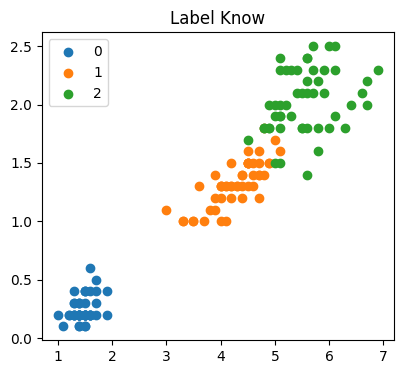

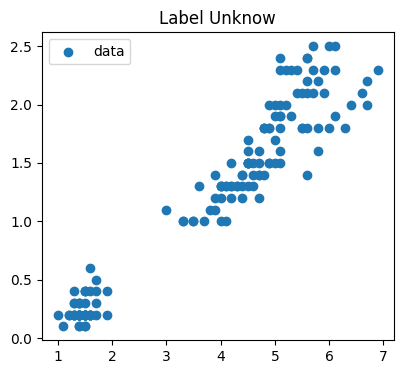

In [74]:
x_axis,y_axis='petal_length','petal_width'
iris_types=[0,1,2] # 花的种类
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# 画出分好类的数据点
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],data[y_axis][data['class']==iris_type],label=iris_type) # [data['class']==iris_types]判断是当前的类别
    plt.title('Label Know')
plt.legend()
plt.show()
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
# 画出所有的数据点
plt.scatter(data[x_axis][:],data[y_axis][:],label='data')
plt.title('Label Unknow')
plt.legend()
plt.show()

### 训练聚类

In [75]:
num_examples=data.shape[0]
x_train=data[[x_axis,y_axis]].values.reshape((num_examples,2)) 

### 指定kmeans所需的参数

In [76]:
num_class=3
max_iteration=50

### 训练kmeans

In [77]:
k_means=KMeans(x_train,num_class)
centroids,closest_centroids_ids=k_means.train(max_iteration)

### 对比结果

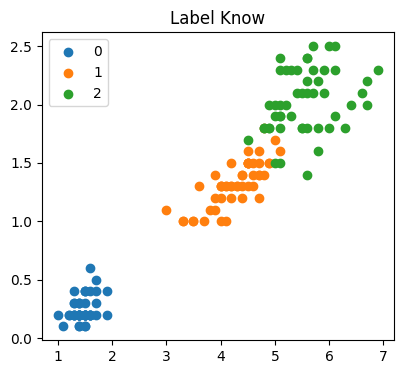

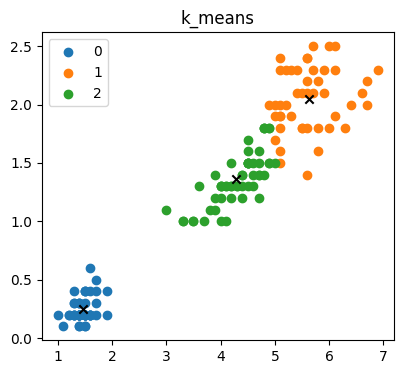

In [80]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# 画出分好类的数据点
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],data[y_axis][data['class']==iris_type],label=iris_type) # [data['class']==iris_types]判断是当前的类别
    plt.title('Label Know')
plt.legend()
# 画出聚类后的图像
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
for centroid_id,centroid in enumerate(centroids):
    current_examples_index=(closest_centroids_ids==centroid_id).flatten() # 找到和当前中心点同一类的数据点
    plt.scatter(data[x_axis][current_examples_index],data[y_axis][current_examples_index],label=centroid_id)
    plt.legend()
# 画出中心点
for centroid_id,centroid in enumerate(centroids):
    plt.scatter(centroid[0],centroid[1],c='black',marker='x')
plt.title('k_means')
plt.show()